In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (8,6) # figsize

In [4]:
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.shape

(303, 14)

In [5]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


<span style="font-size:18px;">Meaning of Some Columns </span>
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


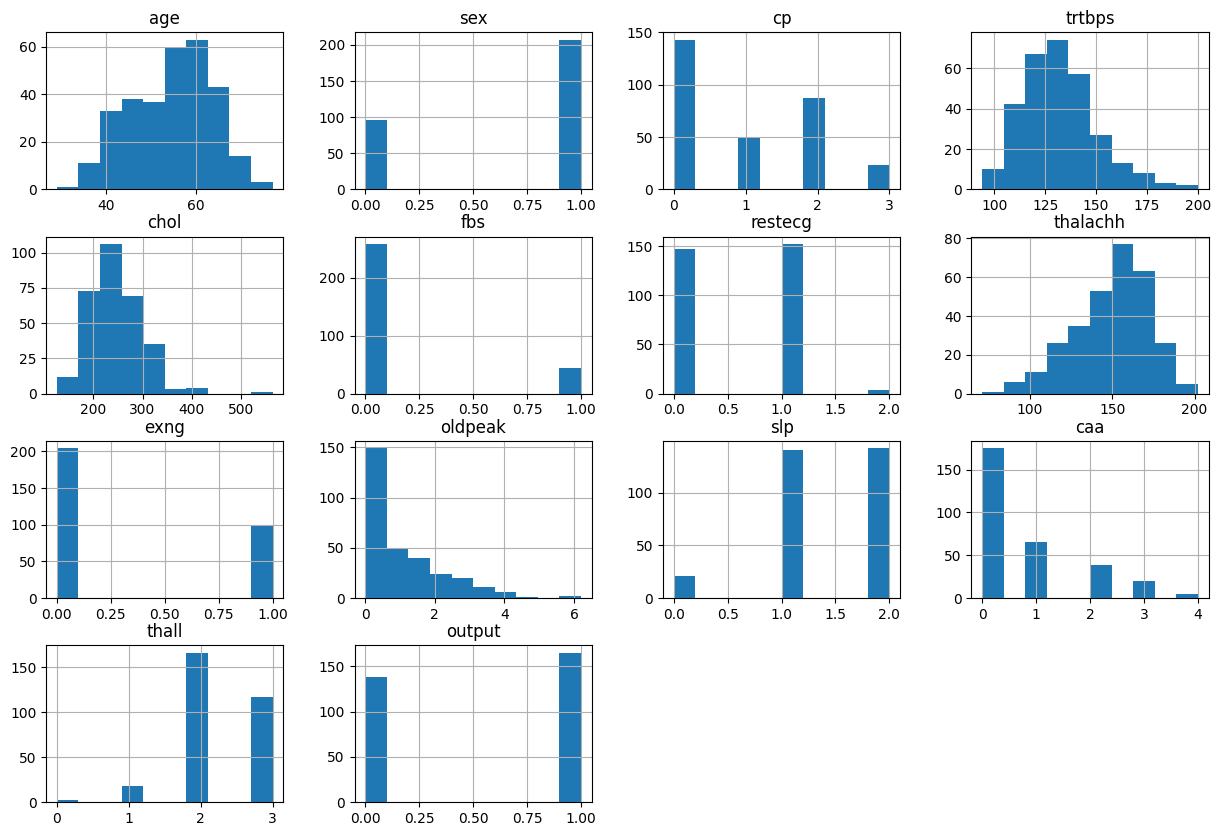

In [7]:
df.hist(figsize=(15, 10))
print("")

<span style="font-size:18px;"> lets see connections between feature columns and output </span>

Text(0.5, 1.0, 'Sex - Heart attack Probability')

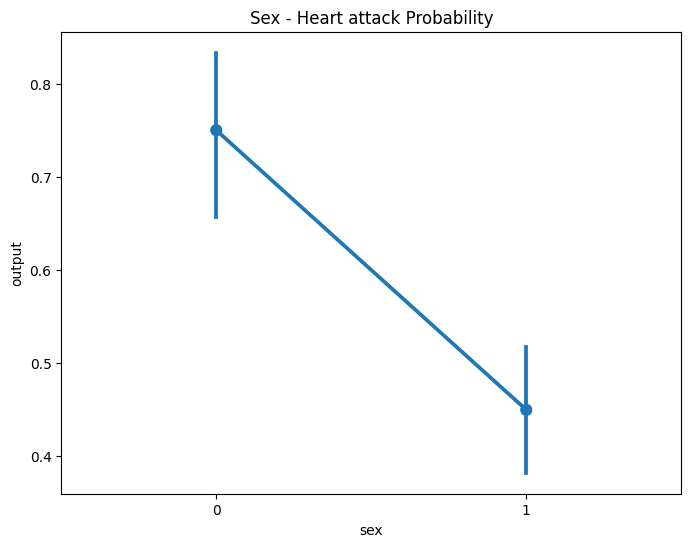

In [8]:
sns.pointplot(data=df,x="sex",y="output")
plt.title("Sex - Heart attack Probability")

<span style="font-size:18px;"> **Gender is  important for us , it clearly has affect to heart attacks**  </span>

<span style="font-size:18px;"> I want to see how age affects to heart attack , therefore i will create age category column and i will create pointplot with that column </span>

In [9]:
# first see distribution
df["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age')

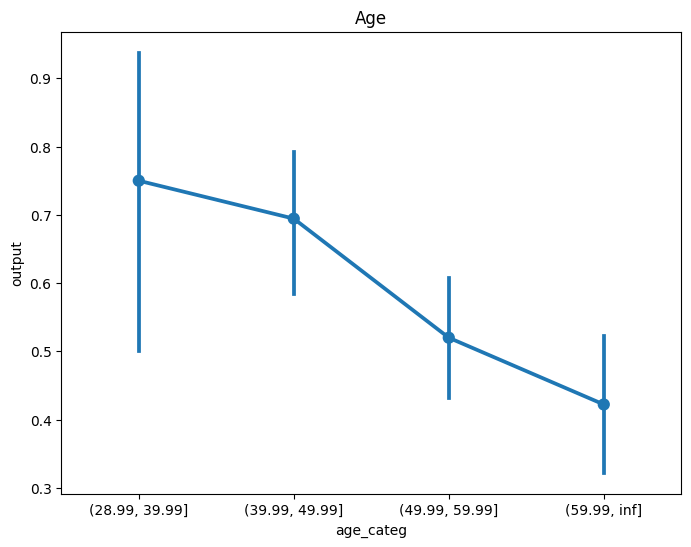

In [10]:
# create age categoryabs
df["age_categ"]=pd.cut(df["age"],bins=[28.99 ,39.99, 49.99,59.99,np.inf])
sns.pointplot(data=df,x="age_categ",y="output")
plt.title("Age")

<span style="font-size:18px;"> **age has great affect to heart attack** </span>

In [11]:
plt.rcParams["figure.figsize"] = (20,5) 

Text(0.5, 1.0, 'exng')

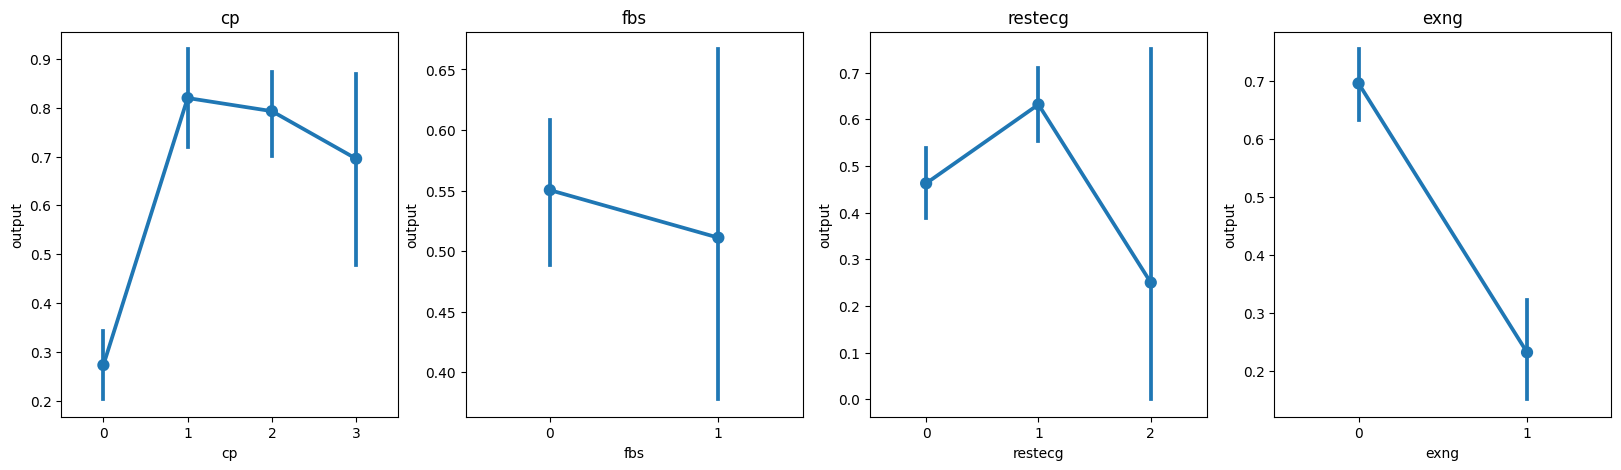

In [12]:
plt.subplot(141)
sns.pointplot(data=df,x="cp",y="output")
plt.title("cp")

plt.subplot(142)
sns.pointplot(data=df,x="fbs",y="output")
plt.title("fbs")

plt.subplot(143)
sns.pointplot(data=df,x="restecg",y="output")
plt.title("restecg")

plt.subplot(144)
sns.pointplot(data=df,x="exng",y="output")
plt.title("exng")

In [13]:
# i am not sure but fbs may not has affect to heart attack
df.groupby(["fbs"])["output"].value_counts()

fbs  output
0    1         142
     0         116
1    1          23
     0          22
Name: count, dtype: int64

Text(0.5, 1.0, 'thall')

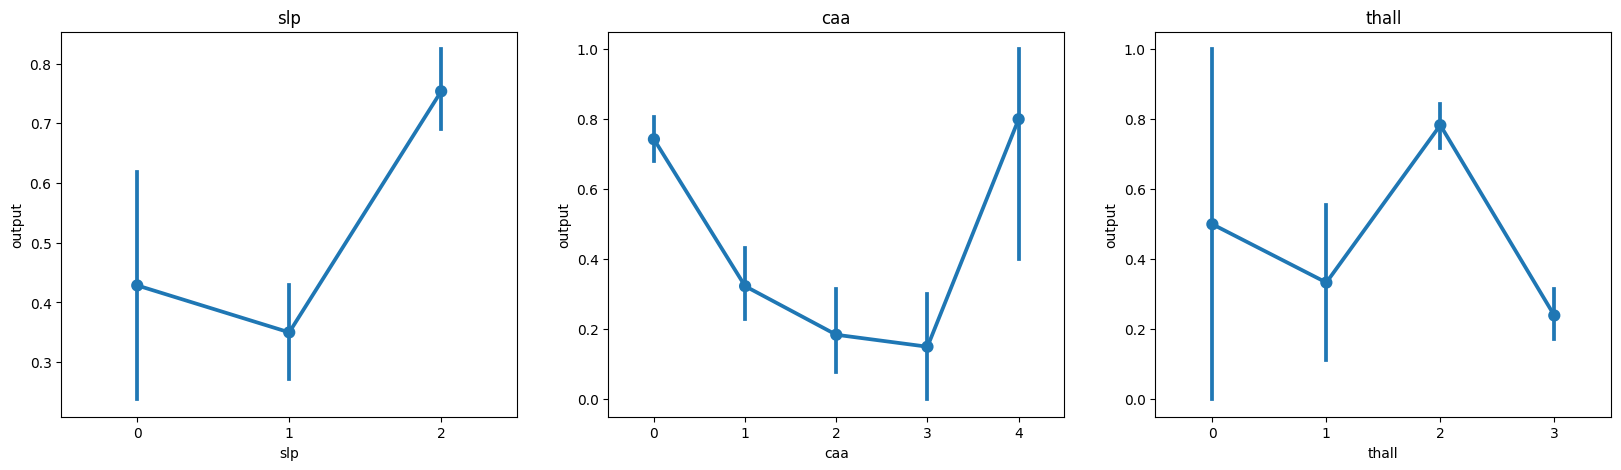

In [14]:
plt.subplot(131)
sns.pointplot(data=df,x="slp",y="output")
plt.title("slp")

plt.subplot(132)
sns.pointplot(data=df,x="caa",y="output")
plt.title("caa")

plt.subplot(133)
sns.pointplot(data=df,x="thall",y="output")
plt.title("thall")

<span style="font-size:18px;"> you can check other columns like this , if they are not categorical columns convert them to categorical , just like in age column </span>

In [15]:
# dataset is not imbalanced
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

<Axes: >

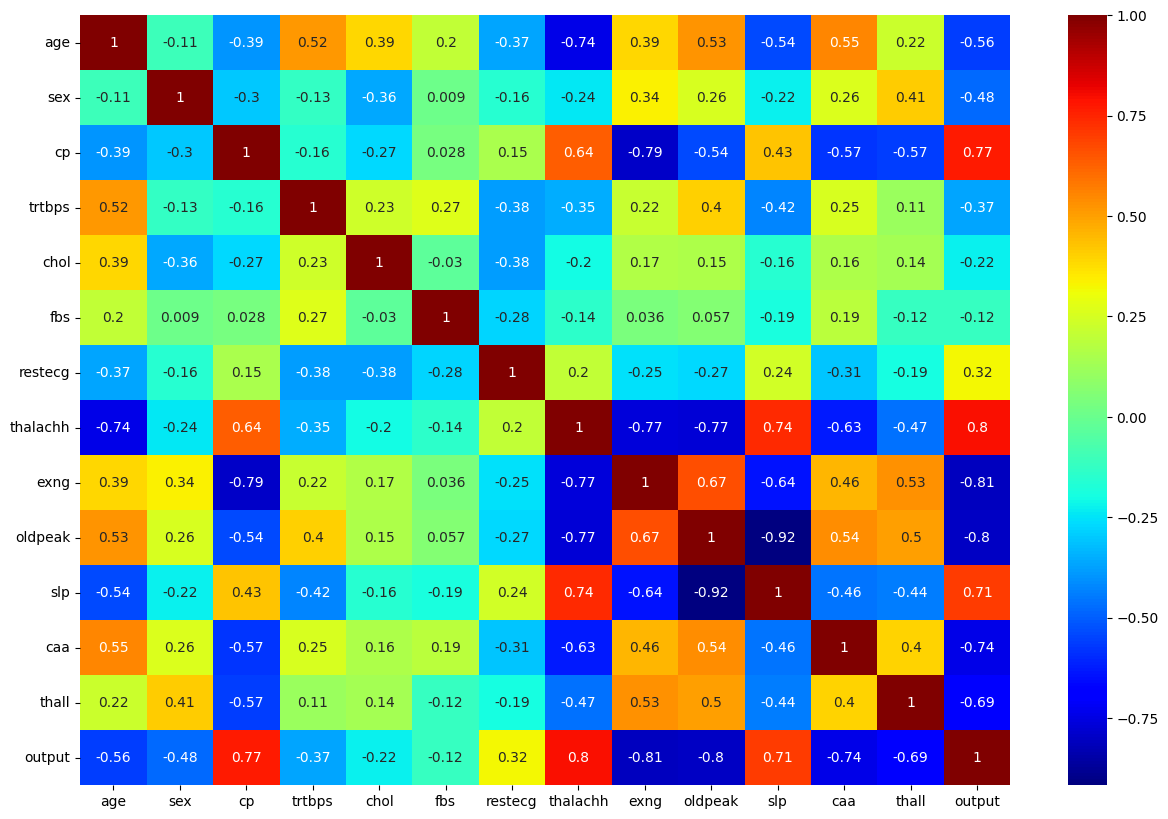

In [16]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(15,10))
sns.heatmap(corr.corr(), annot=True, cmap='jet')

In [17]:
# we can drop fbs column , i mentioned it above and as you can see from heatmap it doesnt have much affect
# but first i will train models with fbs column  , after i train models without fbs column

In [18]:
df=df.drop("age_categ",axis=1)

# Splitting

In [19]:
X=df.drop("output",axis=1)
y=df["output"]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [22]:
# categories that need to scale
# age , trtbps , chol , thalachh , oldpeak --> i will use column transformer because i dont need to scale all columns
# other columns are categorical , no need to touch them and they are not string  no need to encode them ,
scale_list=["age" , "trtbps" , "chol" , "thalachh" , "oldpeak" ]
cols=X_train.columns

In [23]:
#  will use column transformer because i dont need to scale all columns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

column_transformer=ColumnTransformer([("scaler",StandardScaler(),scale_list)],remainder="passthrough")
pd.DataFrame(column_transformer.fit_transform(X_train),columns=cols).head(3) # we are gonna use this in models

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.267453,1.403628,-0.264730,0.633359,-0.931266,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0
1,0.483126,-0.243918,-0.526658,-0.696636,1.062194,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.345818,-0.302759,0.146871,0.589026,-0.750042,1.0,0.0,1.0,1.0,0.0,1.0,2.0,3.0


In [24]:
# i am gonna use this two in models
X_train = pd.DataFrame(column_transformer.fit_transform(X_train),columns=cols)
X_test = pd.DataFrame(column_transformer.transform(X_test),columns=cols)

# Models 

# SGD Classifier

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [26]:
from sklearn.metrics import classification_report,accuracy_score

# for training set
predictions=sgd_clf.predict(X_train)
accuracy_score(y_train,predictions)

0.8061674008810573

In [27]:
# for test set
predictions=sgd_clf.predict(X_test)
accuracy_score(y_test,predictions)

0.881578947368421

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_clf=LogisticRegression(random_state=42)
logistic_clf.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [30]:
# for training set
predictions=logistic_clf.predict(X_train)
accuracy_score(y_train,predictions)

0.8546255506607929

In [31]:
# for test set
predictions=logistic_clf.predict(X_test)
accuracy_score(y_test,predictions)

0.8947368421052632

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=6,random_state=42,min_samples_leaf=14)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=14, random_state=42)

In [34]:
# for training set
predictions=tree_clf.predict(X_train)
accuracy_score(y_train,predictions)

0.8590308370044053

In [35]:
# for test set
predictions=tree_clf.predict(X_test)
accuracy_score(y_test,predictions)

0.8157894736842105

# Random Forest Classification

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=4)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [37]:
# for training set
predictions=forest_clf.predict(X_train)
accuracy_score(y_train,predictions)

0.9251101321585903

In [38]:
# for test set
predictions=forest_clf.predict(X_test)
accuracy_score(y_test,predictions)

0.881578947368421

# Feature Importance

In [39]:
plt.rcParams["figure.figsize"] = (8,6 ) 

Text(0.5, 1.0, 'Feature Importance')

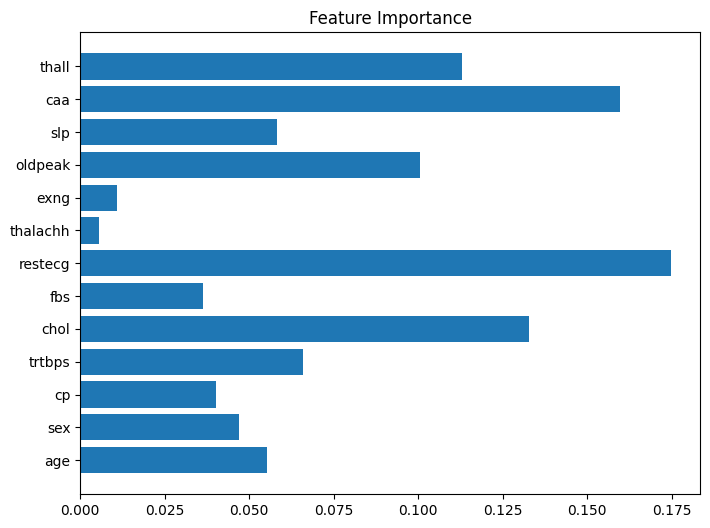

In [40]:
plt.barh(X_train.columns,forest_clf.feature_importances_)
plt.title("Feature Importance")

# Grid Search

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid={"n_estimators":[50,75,100,200,300],"max_depth":[3,4,5,6,7]}
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 75, 100, 200, 300]})

In [42]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [43]:
grid_search.best_score_

0.8281159420289855